<a href="https://colab.research.google.com/github/shyguuy/lab/blob/main/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!pip install datasets seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.4 MB/s eta 0:00:00


In [31]:
training_dataframe = pd.read_excel('dataset_modeling.xls', sheet_name=['Training_Data'])
training_dataframe = pd.concat(training_dataframe).reset_index().drop(['level_0','level_1','Unnamed: 6',	'Unnamed: 7',	'Attribute Information:'], axis = 1)
training_dataframe

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [32]:
test_dataframe = pd.read_excel('dataset_modeling.xls', sheet_name=['Test_Data'])
test_dataframe = pd.concat(test_dataframe).reset_index().drop(['level_0','level_1','Unnamed: 6',	'Unnamed: 7',	'Attribute Information:'], axis = 1)
test_dataframe

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High
141,0.85,0.82,0.66,0.83,0.83,High
142,0.56,0.60,0.77,0.13,0.32,Low
143,0.66,0.68,0.81,0.57,0.57,Middle


STG (Степень затраченного времени на изучение материалов прикладного предмета)

SCG (Степень количества повторений материалов прикладного предмета)

STR (Степень затраченного времени на изучение смежных предметов)

LPR (Экзаменационная успеваемость по смежным предметам)

PEG (Экзаменационная успеваемость по прикладным предметам)

UNS (Уровень знаний)

### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

In [33]:
df = pd.concat([training_dataframe,test_dataframe])
pd.unique(df['UNS'])


array(['very_low', 'High', 'Low', 'Middle', 'Very Low'], dtype=object)

In [34]:
df['UNS'] = df['UNS'].replace(['Very Low', 'very_low'], 'Very Low')
pd.unique(df['UNS'])

array(['Very Low', 'High', 'Low', 'Middle'], dtype=object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 144
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 22.0+ KB


In [37]:
from sklearn.preprocessing import OneHotEncoder

df['UNS'] = df['UNS'].astype("category")
category_cols = df.select_dtypes(include=['category']).columns

one = OneHotEncoder(handle_unknown='ignore')

df_encoded = pd.get_dummies(df, columns=category_cols)
encoded_features = one.fit_transform(df[category_cols])
encoded_columns = one.get_feature_names_out(category_cols)

df_encoded

,STG,SCG,STR,LPR,PEG,UNS_High,UNS_Low,UNS_Middle,UNS_Very Low
0,0.00,0.00,0.00,0.00,0.00,0,0,0,1
1,0.08,0.08,0.10,0.24,0.90,1,0,0,0
2,0.06,0.06,0.05,0.25,0.33,0,1,0,0
3,0.10,0.10,0.15,0.65,0.30,0,0,1,0
4,0.08,0.08,0.08,0.98,0.24,0,1,0,0
...,...,...,...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,1,0,0,0
141,0.85,0.82,0.66,0.83,0.83,1,0,0,0
142,0.56,0.60,0.77,0.13,0.32,0,1,0,0
143,0.66,0.68,0.81,0.57,0.57,0,0,1,0


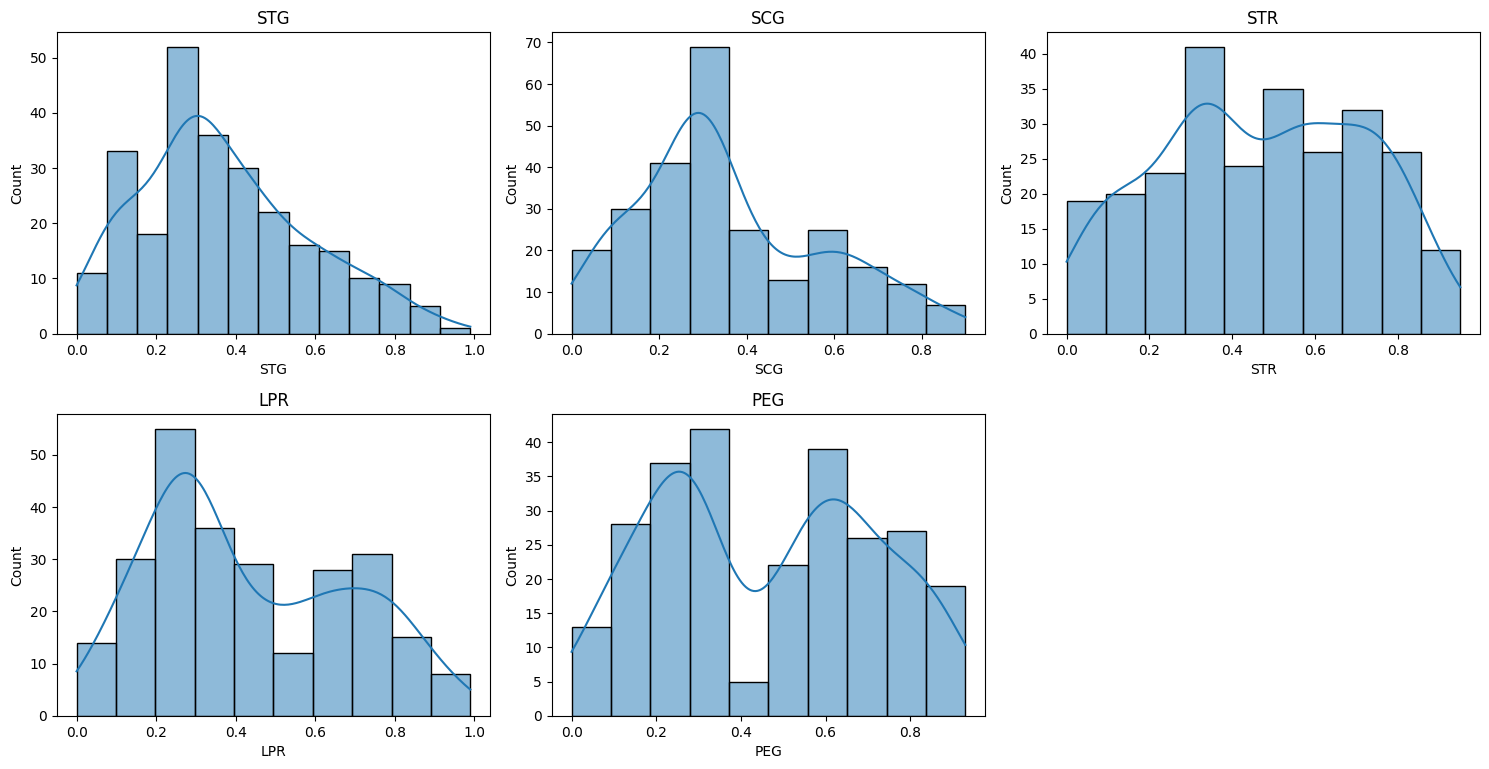

In [40]:
num_columns = num_columns = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(15, 15))
for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(training_dataframe[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<ipython-input-42-ce157e815aeb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


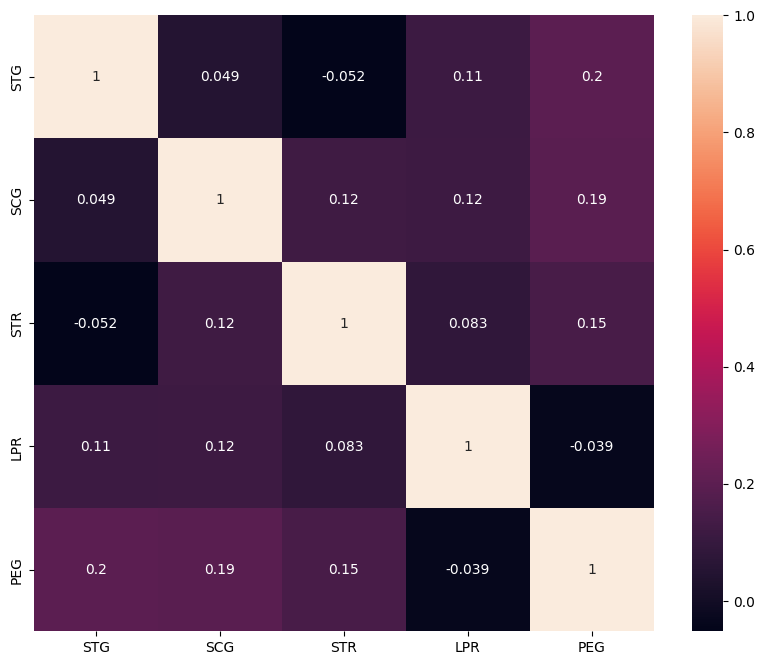

In [42]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

<Axes: xlabel='PEG', ylabel='UNS'>

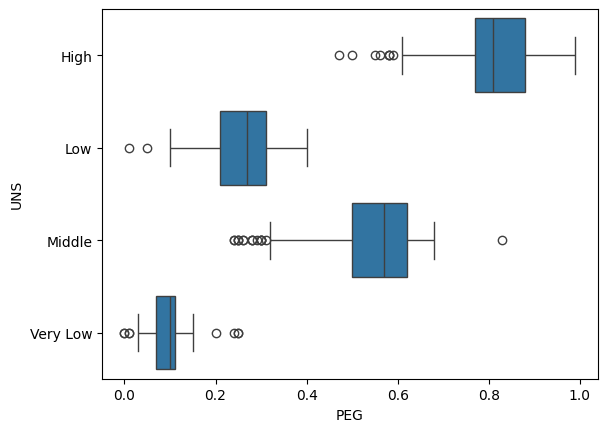

In [43]:
sns.boxplot(data=df, x='PEG', y='UNS')


### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [ ]:
"""
Код здесь
"""

### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
"""
Код здесь
"""

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [ ]:
"""
Код здесь
"""

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""